In [1]:
import torch
import torch2trt
import matplotlib.pyplot as plt
import cv2

In [2]:
from torch2trt import TRTModule

model_trt = TRTModule()
model_trt.load_state_dict(torch.load('/workspace/models/run03/trt_model.pt'))

<All keys matched successfully>

In [3]:
ino = 289
# Read  a sample image and mask from the data-set
img = cv2.imread(f'/workspace/models/train_data/Images/{ino:03d}_cam-image1_.jpg').transpose(2,0,1).reshape(1,3,300,650)
mask = cv2.imread(f'/workspace/models/train_data/Masks/{ino:03d}_cam-image1_mask.png')
input = torch.from_numpy(img).type(torch.cuda.HalfTensor)/255

In [4]:
import time

torch.cuda.current_stream().synchronize()
t0 = time.time()
output_trt = model_trt(input)
torch.cuda.current_stream().synchronize()
t1 = time.time()
print(100.0 / (t1 - t0))

6228.732662092726


(array([  1920., 155428.,   1144.,    894.,    838.,    793.,    855.,
           944.,   1271.,  30913.]),
 array([-0.1486, -0.0337,  0.0812,  0.196 ,  0.3108,  0.4258,  0.5405,
         0.6553,  0.7705,  0.8853,  1.    ], dtype=float16),
 <BarContainer object of 10 artists>)

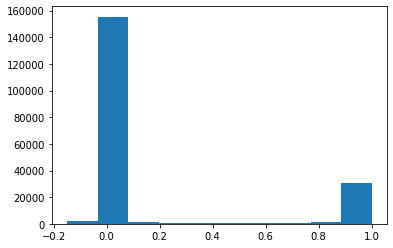

In [5]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(output_trt[0].data.cpu().numpy().flatten())

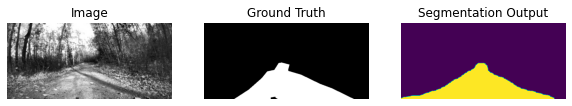

In [6]:
# Plot the input image, ground truth and the predicted output
trt = output_trt[0].detach().cpu().float().numpy()[0]>0.4

plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(trt);
plt.title('Segmentation Output')
plt.axis('off');